# Testing
### Zweitwohnungen und Apartments nach Stadtquartier, Bauperiode und Zimmerzahl
Datum: 22.11.2021

**Importiere die notwendigen Packages**

In [1]:
# Empfehlung für Colab: Installiere alles was Du brauchst
# %pip install pandas pivottablejs numpy altair matplotlib geopandas folium

In [2]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd
import folium 



Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [3]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.integ.stadt-zuerich.ch/dataset/int_dwh_bau_zweitwhg_apartment_quartier_bauperiode_zizahl_od5414

(int_dwh)

In [29]:
#Die Datasets sind nur zum Testen auf INT-DWH-Dropzone. Wenn der Test vorbei ist, sind sie auf PROD. 
# Über den Status kann man einfach switchen

status = "int";
print(status)

int


In [30]:
# Filepath
if status == "prod":
    fp = r"\\szh\ssz\applikationen\OGD_Dropzone\DWH\bau_zweitwhg_apartment_quartier_bauperiode_zizahl_OD5414\BAU541OD5414.csv"

else:
    fp = r"\\szh\ssz\applikationen\OGD_Dropzone\INT_DWH\bau_zweitwhg_apartment_quartier_bauperiode_zizahl_OD5414\BAU541OD5414.csv"

print(fp)

\\szh\ssz\applikationen\OGD_Dropzone\INT_DWH\bau_zweitwhg_apartment_quartier_bauperiode_zizahl_OD5414\BAU541OD5414.csv


In [31]:
# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=',',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   # parse_dates=[0],
    parse_dates=True,
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )
print('done')

done


In der Folge ein paar erste Tests:

In [32]:
type(data2betested)

pandas.core.frame.DataFrame

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [33]:
data2betested.head(300)

,Jahr,QuarSort,QuarLang,KreisSort,KreisLang,BauperiodeSort,BauperiodeLang,Zimmer,Nutzung,Fl_Zweitwhg,Fl_Apartment,AnzWhg
0,2021,11,Rathaus,1,Kreis 1,1,vor 1900,1,Den Erstwohnungen gleichgestellt,0,0,70
1,2021,11,Rathaus,1,Kreis 1,1,vor 1900,1,Den Erstwohnungen gleichgestellt,0,1,22
2,2021,11,Rathaus,1,Kreis 1,1,vor 1900,1,Erstwohnung,0,0,286
3,2021,11,Rathaus,1,Kreis 1,1,vor 1900,1,Unbewohnbar,0,0,6
4,2021,11,Rathaus,1,Kreis 1,1,vor 1900,1,Zweitwohnung,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...
295,2021,14,City,1,Kreis 1,7,ab 2000,4,Erstwohnung,0,0,1
296,2021,21,Wollishofen,2,Kreis 2,1,vor 1900,1,Den Erstwohnungen gleichgestellt,0,0,4
297,2021,21,Wollishofen,2,Kreis 2,1,vor 1900,1,Erstwohnung,0,0,18
298,2021,21,Wollishofen,2,Kreis 2,1,vor 1900,1,Zweitwohnung,0,0,2


In [34]:
data2betested.dtypes

Jahr               int64
QuarSort           int64
QuarLang          object
KreisSort          int64
KreisLang         object
BauperiodeSort     int64
BauperiodeLang    object
Zimmer            object
Nutzung           object
Fl_Zweitwhg        int64
Fl_Apartment       int64
AnzWhg             int64
dtype: object

In [35]:
data2betested.shape

(5120, 12)

Beschreibe einzelne Attribute

In [36]:
data2betested.describe()

,Jahr,QuarSort,KreisSort,BauperiodeSort,Fl_Zweitwhg,Fl_Apartment,AnzWhg
count,5120,5120,5120,5120,5120,5120,5120
mean,2021,68,7,4,0,0,45
std,0,33,3,2,0,0,141
min,2021,11,1,1,0,0,1
25%,2021,41,4,2,0,0,2
50%,2021,72,7,4,0,0,5
75%,2021,92,9,6,0,0,19
max,2021,123,12,7,1,1,1876


Wie viele Nullwerte gibt es im Datensatz?

In [37]:
data2betested.isnull().sum()

Jahr              0
QuarSort          0
QuarLang          0
KreisSort         0
KreisLang         0
BauperiodeSort    0
BauperiodeLang    0
Zimmer            0
Nutzung           0
Fl_Zweitwhg       0
Fl_Apartment      0
AnzWhg            0
dtype: int64

Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

In [38]:
data2betested['Jahr']=pd.to_datetime(data2betested['Jahr'], format='%Y')

#TO DO --> setze das Datum auf den 31.12. der Jahres.
#test=data2betested[['StichtagDatJahr']].date().replace(month=12, day=31)

data2betested



,Jahr,QuarSort,QuarLang,KreisSort,KreisLang,BauperiodeSort,BauperiodeLang,Zimmer,Nutzung,Fl_Zweitwhg,Fl_Apartment,AnzWhg
0,2021-01-01,11,Rathaus,1,Kreis 1,1,vor 1900,1,Den Erstwohnungen gleichgestellt,0,0,70
1,2021-01-01,11,Rathaus,1,Kreis 1,1,vor 1900,1,Den Erstwohnungen gleichgestellt,0,1,22
2,2021-01-01,11,Rathaus,1,Kreis 1,1,vor 1900,1,Erstwohnung,0,0,286
3,2021-01-01,11,Rathaus,1,Kreis 1,1,vor 1900,1,Unbewohnbar,0,0,6
4,2021-01-01,11,Rathaus,1,Kreis 1,1,vor 1900,1,Zweitwohnung,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...
5115,2021-01-01,123,Hirzenbach,12,Kreis 12,7,ab 2000,5,Zweitwohnung,0,0,3
5116,2021-01-01,123,Hirzenbach,12,Kreis 12,7,ab 2000,5,Zweitwohnung,1,0,1
5117,2021-01-01,123,Hirzenbach,12,Kreis 12,7,ab 2000,6+,Den Erstwohnungen gleichgestellt,0,0,3
5118,2021-01-01,123,Hirzenbach,12,Kreis 12,7,ab 2000,6+,Erstwohnung,0,0,4


Bereite die Daten für die Grafik unten vor

In [39]:
Jahre = data2betested.groupby("Jahr")
len(Jahre)

1

In [40]:
for key, group in Jahre:
    print(key, len(group))

2021-01-01 00:00:00 5120


In [41]:
myJahr = "2021-01-01"
aktuellesJahr=Jahre.get_group(myJahr)   
aktuellesJahr.head(3)


,Jahr,QuarSort,QuarLang,KreisSort,KreisLang,BauperiodeSort,BauperiodeLang,Zimmer,Nutzung,Fl_Zweitwhg,Fl_Apartment,AnzWhg
0,2021-01-01,11,Rathaus,1,Kreis 1,1,vor 1900,1,Den Erstwohnungen gleichgestellt,0,0,70
1,2021-01-01,11,Rathaus,1,Kreis 1,1,vor 1900,1,Den Erstwohnungen gleichgestellt,0,1,22
2,2021-01-01,11,Rathaus,1,Kreis 1,1,vor 1900,1,Erstwohnung,0,0,286


**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [42]:
#test = data2betested.groupby(['StichtagDatJahr', 'AlterV20Kurz'])[['AnzBestWir']].agg()

# produces Pandas Series
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])['AnzBestWir'].sum()
# Produces Pandas DataFrame
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])[['AnzBestWir']].sum()
    

    

**Einfache Visualisierungen zur Plausi**

Exploriere die Daten mit Pivottable.JS

In [43]:
from pivottablejs import pivot_ui

pivot_ui(data2betested)

Liniendiagramm 
[Link zur Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [115]:
mySelection = data2betested[(data2betested.Jahr=="2021") & (data2betested.QuarSort >1)]
mySelection.head(3)

,Jahr,QuarSort,QuarLang,KreisSort,KreisLang,BauperiodeSort,BauperiodeLang,Zimmer,Nutzung,Fl_Zweitwhg,Fl_Apartment,AnzWhg
0,2021-01-01,11,Rathaus,1,Kreis 1,1,vor 1900,1,Den Erstwohnungen gleichgestellt,0,0,70
1,2021-01-01,11,Rathaus,1,Kreis 1,1,vor 1900,1,Den Erstwohnungen gleichgestellt,0,1,22
2,2021-01-01,11,Rathaus,1,Kreis 1,1,vor 1900,1,Erstwohnung,0,0,286


In [171]:
#Testaggregation

agg_mySelection = mySelection \
    .groupby(['BauperiodeSort','BauperiodeLang']) \
    .agg(AnzWhg=('AnzWhg', 'sum')) \
    .query('AnzWhg > 0') \
    .sort_values('BauperiodeSort', ascending=False) \

agg_mySelection.head(10)

,,AnzWhg
BauperiodeSort,BauperiodeLang,
7,ab 2000,1062
6,1980–199,510
5,1960–197,1125
4,1940–195,973
3,1920–193,943
2,1900–191,729
1,vor 1900,1541


In [172]:
mySelection =data2betested[(data2betested.Fl_Zweitwhg == 1)]

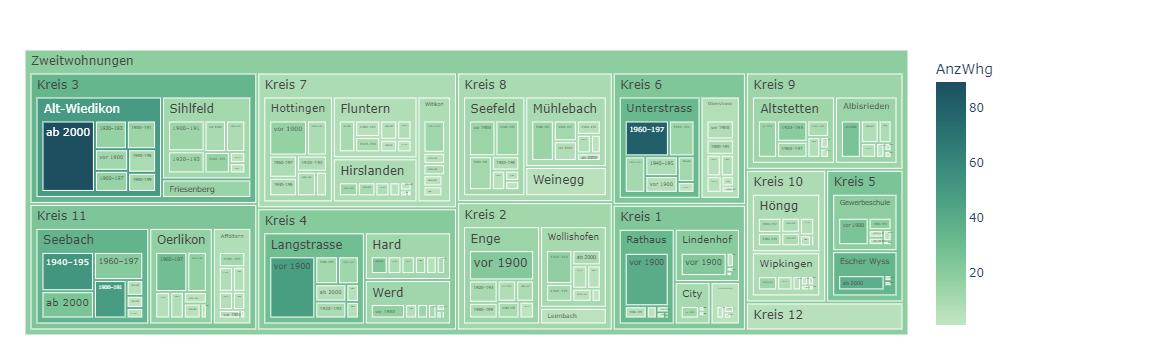

In [160]:
import plotly.express as px


df = mySelection

fig = px.treemap(df, path=[px.Constant("Zweitwohnungen"), 'KreisLang', 'QuarLang', 'BauperiodeLang'], values='AnzWhg',
                color='AnzWhg', hover_data=['QuarLang'],
                color_continuous_scale='blugrn')
                #color_continuous_midpoint=np.average(df['AnzBestWir'], weights=df['AnzBestWir']))
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=250, b=25))
fig.show()



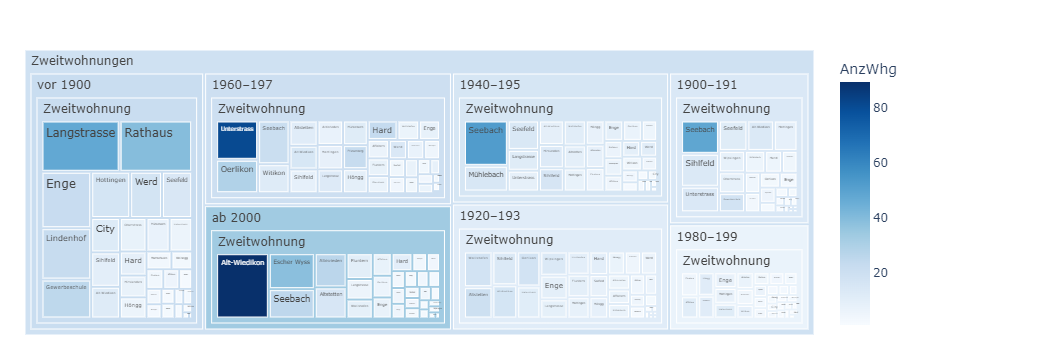

In [165]:
df = mySelection

fig = px.treemap(df, path=[px.Constant("Zweitwohnungen"), 'BauperiodeLang', 'Nutzung', 'QuarLang'], values='AnzWhg',
                color='AnzWhg', hover_data=['QuarLang'],
                color_continuous_scale='blues')
                #color_continuous_midpoint=np.average(df['AnzBestWir'], weights=df['AnzBestWir']))
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=250, b=25))
fig.show()



In [173]:
# df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#aktuellesJahr[[aktuellesJahr.KreisSort =7]])
highlight = alt.selection(type='single', on='mouseover',
                          fields=['BauperiodeLang'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(myGraph).encode(
    x='KreisLang',
    y='AnzWhg',
    color='BauperiodeLang'
)

points = base.mark_circle().encode(
    opacity=alt.value(1)
).add_selection(
    highlight
).properties(
    width=700 , height=300
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

#points + lines
points

ValueError: Hierarchical indices not supported

alt.Chart(...)

In [174]:
alt.Chart(data2betested).mark_circle(size=60).encode(
    x='Jahr',
    y='Nutzung',
    #color='Nutzung',
    #color=alt.Color('AnzNat', scale=alt.Scale(scheme='dark2')),
    color=alt.Color('Nutzung', scale=alt.Scale(scheme='greens')),
    tooltip=['Jahr','QuarLang','Nutzung','AnzWhg']
).interactive() # this makes the axes interactive: now you can zoom & pan


MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

alt.Chart(...)

**Test: Choroplethenkarte**
Importiere die Geodaten als GeoJSON

In [50]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
# Wenn die Daten lokal agelegt sind, dann kannst Du folgendes machen:
##input_stadtquartiere = r"//szh.loc/ssz/data/GIS/Daten/Vektor/_aktuell/stzh.adm_statistische_quartiere_map.json"
##df_stadtquartiere = gpd.read_file(input_stadtquartiere)
##df_stadtquartiere.head(2)
#df_stadtkreise.dtypes

geojson_url = "https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Statistische_Quartiere?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=adm_statistische_quartiere_map"
df_adm_statistische_quartiere_map = gpd.read_file(geojson_url)

df_adm_statistische_quartiere_map.head(5)


,id,kname,knr,objectid,objid,qname,qnr,geometry
0,adm_statistische_quartiere_map.1,Kreis 7,7,1,34,Hirslanden,73,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ..."
1,adm_statistische_quartiere_map.2,Kreis 8,8,2,33,Weinegg,83,"POLYGON ((8.55670 47.36405, 8.55672 47.36403, ..."
2,adm_statistische_quartiere_map.3,Kreis 8,8,3,32,Mühlebach,82,"POLYGON ((8.55423 47.36456, 8.55426 47.36452, ..."
3,adm_statistische_quartiere_map.4,Kreis 8,8,4,31,Seefeld,81,"POLYGON ((8.54795 47.36500, 8.54805 47.36489, ..."
4,adm_statistische_quartiere_map.7,Kreis 4,4,7,16,Werd,41,"POLYGON ((8.53300 47.37394, 8.53299 47.37392, ..."


Joine die importierten statistischen Daten des aktuellen Jahres zum Geodatensatz:

*Siehe dazu Doku zu [Geopandas](https://geopandas.org/docs/user_guide/mergingdata.html)*

In [52]:
mySelection.head(2)

,StichtagDatJahr,QuarSort,QuarLang,KreisSort,KreisLang,Nutzung,Leerflaeche,BueroNettofl,BueroLeerProz
926,2021-01-01,11,Rathaus,1,Kreis 1,Büro,373,103999,0
927,2021-01-01,11,Rathaus,1,Kreis 1,Andere,245,NaN,NaN


In [89]:
selectMapAttr1 = data2betested[(data2betested.StichtagDatJahr=="2021") & (data2betested.Nutzung =="Büro")] #& (data2betested.QuarSort > 30)
selectMapAttr1.head(2)
#stats_agg_quartiere=aktuellesJahr.groupby(['Jahr', 'QuarSort'])['AnzWhg','Wohnungsfl', 'PersInGeb'].sum()
#test = data2betested.groupby(['StichtagDatJahr', 'AlterV20Kurz'])[['AnzBestWir']].agg()


,StichtagDatJahr,QuarSort,QuarLang,KreisSort,KreisLang,Nutzung,Leerflaeche,BueroNettofl,BueroLeerProz
926,2021-01-01,11,Rathaus,1,Kreis 1,Büro,373,103999,0
931,2021-01-01,12,Hochschulen,1,Kreis 1,Büro,300,194642,0


Was ist mit Leimbach los?

In [90]:
leimbach = data2betested[(data2betested.StichtagDatJahr<"2021") & (data2betested.QuarLang =="Leimbach")] #& (data2betested.QuarSort > 30)
leimbach

,StichtagDatJahr,QuarSort,QuarLang,KreisSort,KreisLang,Nutzung,Leerflaeche,BueroNettofl,BueroLeerProz
184,2012-01-01,23,Leimbach,2,Kreis 2,Andere,224,NaN,NaN
348,2014-01-01,23,Leimbach,2,Kreis 2,Andere,115,NaN,NaN
349,2014-01-01,23,Leimbach,2,Kreis 2,Verkauf,228,NaN,NaN
350,2014-01-01,23,Leimbach,2,Kreis 2,Büro,58,3359,2
854,2020-01-01,23,Leimbach,2,Kreis 2,Büro,40,3638,1


Und was mit Hard?

In [92]:
#hard = data2betested[(data2betested.StichtagDatJahr<"2021") & (data2betested.QuarLang =="Hard")] #& (data2betested.QuarSort > 30)
#hard

In [74]:
# Rename attribute stznr to StatZoneSort, so the IDs have the same name

stadtquartiere_shapes = df_adm_statistische_quartiere_map[['geometry', 'qnr', 'qname', 'knr']].rename(columns={'qnr': 'QuarSort'})

# Merge with `merge` method on shared variable (stznr und StatZoneSort):
stadtquartiere_shapes_joined = stadtquartiere_shapes.merge(selectMapAttr1, on='QuarSort')

stadtquartiere_shapes_joined.head(2)


,geometry,QuarSort,qname,knr,StichtagDatJahr,QuarLang,KreisSort,KreisLang,Nutzung,Leerflaeche,BueroNettofl,BueroLeerProz
0,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ...",73,Hirslanden,7,2021-01-01,Hirslanden,7,Kreis 7,Büro,224,51117,0
1,"POLYGON ((8.55670 47.36405, 8.55672 47.36403, ...",83,Weinegg,8,2021-01-01,Weinegg,8,Kreis 8,Büro,265,62546,0


<AxesSubplot:>

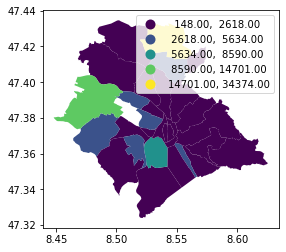

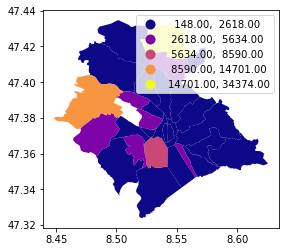

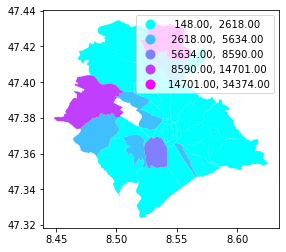

In [75]:
# Plot by StatQuartiere
# Weitere Schemes: scheme='quantiles', scheme='fisherjenks', scheme='natural_breaks',

stadtquartiere_shapes_joined.plot(column='Leerflaeche', cmap='viridis', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

stadtquartiere_shapes_joined.plot(column='Leerflaeche', cmap='plasma', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html
stadtquartiere_shapes_joined.plot(column='Leerflaeche', cmap='cool', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

Noch zu prüfen, folgendes schöne Beispiel: https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

Konkrete Beispiele von Bookeh in Jupyter NB: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html

**Sharepoint als gecheckt markieren!**

Record auf Sharepoint: **[Link](http://kollaboration.intranet.stzh.ch/orga/ssz-produkte/Lists/SASA_Outputs/EditForm.aspx?ID=157&Source=%2Forga%2Fssz%2Dprodukte%2FLists%2FSASA%5FOutputs)**